Problem Statement:

The following dataset is Car Evaluation Dataset used to classify car acceptability based on different features into classes: unacceptable, acceptable, good, and very good. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the data dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', sep=",")
df.columns=['Buying','Maint','Doors','Persons','lug_boot','Safety','Class']
df.head()

,Buying,Maint,Doors,Persons,lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df['Class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [5]:
dict1 = {'unacc': 1,'acc': 2, 'vgood':3,'good':4}
df['Class']= df['Class'].map(dict1)

In [6]:

df['Buying'].unique()


array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
dict2 = {'vhigh': 1,'high': 2, 'med':3,'low':4}
df['Buying']= df['Buying'].map(dict2)

In [8]:
df['Maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
#dict2 = {'vhigh': 1,'high': 2, 'med':3,'low':4}
df['Maint']= df['Maint'].map(dict2)

In [10]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [11]:
dict3 = {'big': 1,'med': 2, 'small':3}
df['lug_boot']= df['lug_boot'].map(dict3)

In [12]:
df['Safety'].unique()

array(['med', 'high', 'low'], dtype=object)

In [13]:
dict4 = {'high': 1,'med': 2, 'low':3}
df['Safety']= df['Safety'].map(dict4)

In [14]:
df['Doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [15]:
dict5 = {'2': 1,'3': 2, '4':3,'5more':4}
df['Doors']= df['Doors'].map(dict5)

In [16]:
df['Persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [17]:
dict6 = {'2': 1, '4':2,'more':3}

In [18]:
df['Persons']= df['Persons'].map(dict6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Buying    1727 non-null   int64
 1   Maint     1727 non-null   int64
 2   Doors     1727 non-null   int64
 3   Persons   1727 non-null   int64
 4   lug_boot  1727 non-null   int64
 5   Safety    1727 non-null   int64
 6   Class     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


####  Visualize the correlation between all the variables of the dataset.

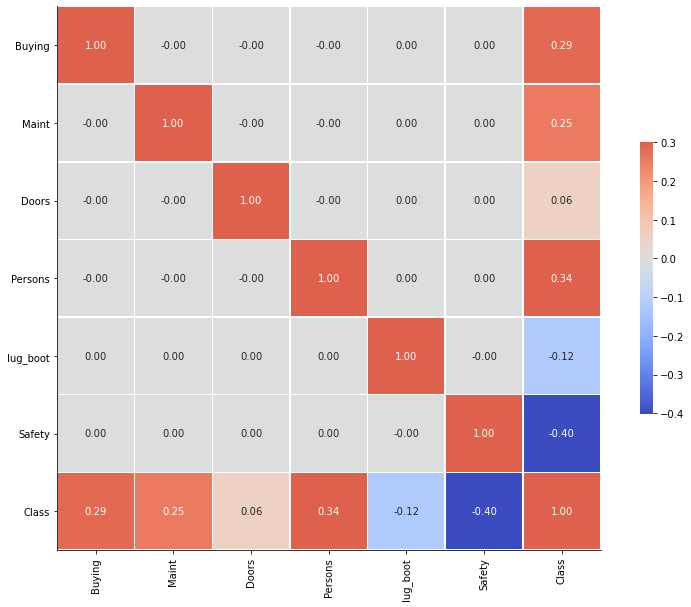

In [20]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

#### Visualize the dataset using any two appropriate graphs.

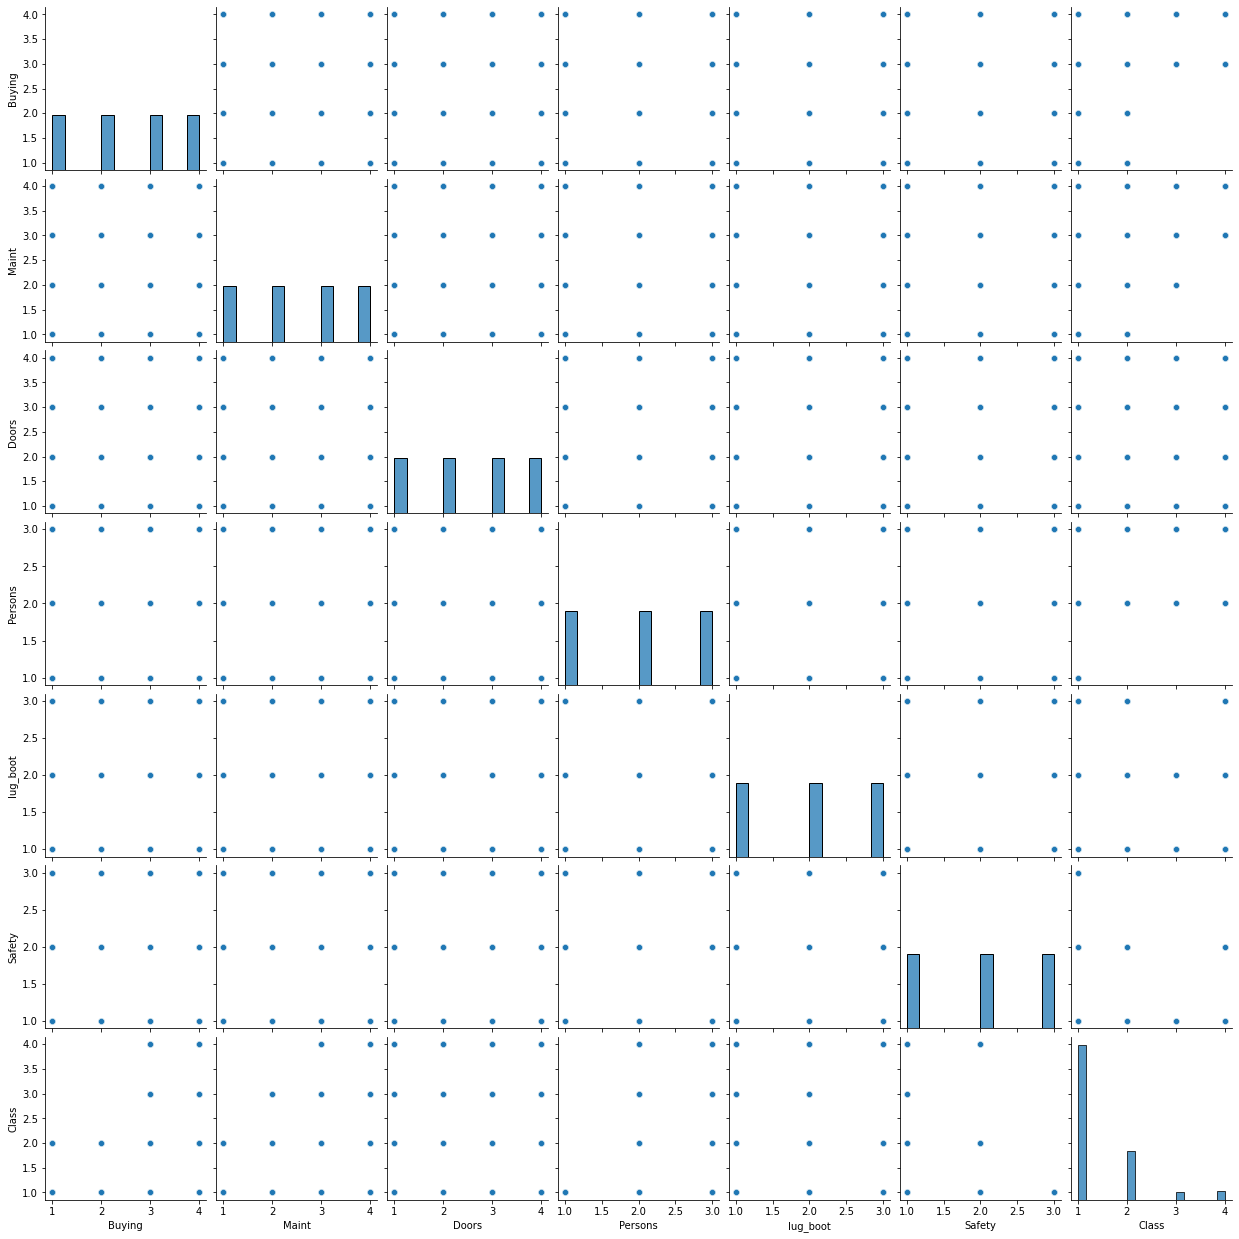

In [21]:
sns.pairplot(df)

<AxesSubplot:xlabel='variable', ylabel='value'>

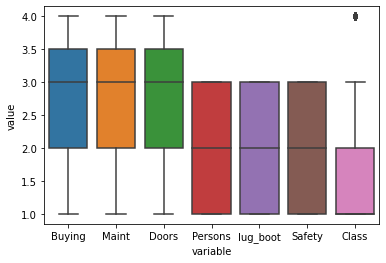

In [22]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

#### Extract X as all columns except the last column and Y as the last column.

In [23]:
df_new = df
X = df_new
Y = df_new['Class']
del X['Class']

In [24]:
df

,Buying,Maint,Doors,Persons,lug_boot,Safety
0,1,1,1,1,3,2
1,1,1,1,1,3,1
2,1,1,1,1,2,3
3,1,1,1,1,2,2
4,1,1,1,1,2,1
...,...,...,...,...,...,...
1722,4,4,4,3,2,2
1723,4,4,4,3,2,1
1724,4,4,4,3,1,3
1725,4,4,4,3,1,2


#### Do feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

#### Split the data into a training set and testing set.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

#### 1. Perform 5-fold cross-validation;  2.Train an SVM model for the dataset ; 3. Get the classification report and confusion matrix.

In [28]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pipeline = make_pipeline(SVC(kernel='linear'))

strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    xtrain=X_train.iloc[test, :]
    y_pred=pipeline.predict(X_train.iloc[test, :])
    type(y_pred)

    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Fold:  1, Training/Test Split Distribution: [  0 668 221  43  34], Accuracy: 0.822
Fold:  2, Training/Test Split Distribution: [  0 668 221  43  34], Accuracy: 0.806
Fold:  3, Training/Test Split Distribution: [  0 668 221  43  34], Accuracy: 0.855
Fold:  4, Training/Test Split Distribution: [  0 668 221  43  35], Accuracy: 0.809
Fold:  5, Training/Test Split Distribution: [  0 668 220  44  35], Accuracy: 0.851


Cross-Validation accuracy: 0.829 +/- 0.021
